## Задание 3.4

Требуется опеделить:

* превосходит ли один переводчик в среднем по парам второй переводчик по переводу
* связано ли качество перевода для разных языковых пар для двх переводчиков?
При подсчете BLEU учитывать только слова, регистр не учитывать.

In [248]:
#воспользуемся готовой библиотекой с реализацией оценки BLEU
from nltk.translate.bleu_score import sentence_bleu
# score = sentence_bleu([reference], hypothesis)

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

-----

In [ ]:
# task3.4 - 1

### Рассмотрим данные

Чтобы воспользоваться *sentence_bleu* удалим все посторонние символы и цифры, приведем к нижнему регистру, разделим строчки на слова.

In [311]:
''' data preprocessing'''

def get_word_list(name):
    
    orig_data = [line.strip() for line in open('data/mt/' + str(name) + '.txt', 'r')]
    prep_data = []
    for i in range(len(orig_data)):
        orig_data[i] = re.sub(r'[^\w\s]','',orig_data[i].replace('9','').replace('8','').replace('7','')
                              .replace('6','').replace('5','').replace('4','').replace('3','')
                              .replace('2','').replace('1','').replace('0',''))
        prep_data += orig_data[i].lower().split() 
    return prep_data

def score(num):
    score = []
    for pair in ['de_en', 'en_ru', 'en_kk', 'ru_kk', 'ru_de']:
        score.append(sentence_bleu([get_word_list(str(pair) + '_'+str(num))], get_word_list(str(pair) + '_gold')))
    return score

In [300]:
dict = {'De_En ': [score(1)[0], score(2)[0]],
        'En_Ru ': [score(1)[1], score(2)[1]],
        'En_Kk ': [score(1)[2], score(2)[2]],
        'Ru_Kk ': [score(1)[3], score(2)[3]],
        'Ru_De ': [score(1)[4], score(2)[4]]}
 
df = pd.DataFrame(dict, ['1', '2'])

In [301]:
df

,De_En,En_Ru,En_Kk,Ru_Kk,Ru_De
1,0.368484,0.112064,0.026634,5.435012e-232,0.160097
2,0.363288,0.112051,0.035516,7.295079e-02,0.159672


In [207]:
print('среднее качество перевода для 1-ого переводчика score_1 = {} и 2-ого score_2 = {}'.format(np.array(score(1)).mean(), np.array(score(2)).mean() ))

среднее качество перевода для 1-ого переводчика score_1 = 0.1334559614244618 и 2-ого score_2 = 0.14869561887130378


Можем сделать вывод, что второй переводчик в среднем имеет лучше качество перевода по языковым парам, чем первый

---------

In [225]:
#task3.4 - 2

### Корреляция Спирмена

Посмотрим, связано ли качество переводчиков для разных языковых пар.

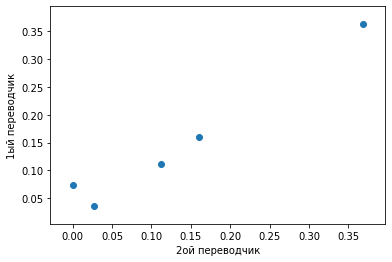

In [292]:
plt.scatter(df.values[0], df.values[1])
plt.ylabel('1ый переводчик')
plt.xlabel('2ой переводчик')
plt.show()

In [314]:
kk, p_value = st.spearmanr(df.values[0], df.values[1])
print('Коэффициент корреляции = {}, p_value = {}'.format(kk, p_value))

Коэффициент корреляции = 0.8999999999999998, p_value = 0.03738607346849874


Поскольку p_value < 0.05 отклоняем гипотезу о независимости выборок -  качества перевода двух переводчиков зависимы между собой